In [5]:
a=[1,2,3]
a= map(int,a)
for item in a:
    print(item)

1
2
3


In [17]:
text = ['25483', '19121', '19121', '8194', '17281', '5609', '28461', '15439', '26526', '24586']
print(len(text))
c = text[0:5]
print(c)

10
['25483', '19121', '19121', '8194', '17281']


# sentences数: 42069
vocab size :6719


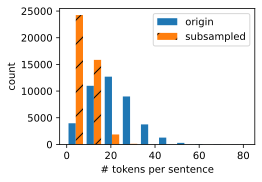

In [1]:
import math
import os
import random
import torch
from d2l import torch as d2l


#@save
d2l.DATA_HUB['ptb'] = (d2l.DATA_URL + 'ptb.zip',
                       '319d85e578af0cdc590547f26231e4e31cdf1e42')

#@save
def read_ptb():
    """将PTB数据集加载到文本行的列表中。"""
    data_dir = d2l.download_extract('ptb')
    # Read the training set.
    with open(os.path.join(data_dir, 'ptb.train.txt')) as f:
        raw_text = f.read()
    return [line.split() for line in raw_text.split('\n')]

sentences = read_ptb()
print(f'# sentences数: {len(sentences)}')

vocab = d2l.Vocab(sentences,min_freq=10)
print(f'vocab size :{len(vocab)}')

#@save
def subsample(sentences, vocab):
    """下采样高频词。"""
    # 排除未知词元 '<unk>'
    # 下面这个 vocab.unk 是什么意思？unk 不是一个函数吗？为什么可以直接作为一个属性使用？ => 因为unk是一个@property装饰器修饰的函数    
    sentences = [[token for token in line if vocab[token] != vocab.unk]
                 for line in sentences]
    counter = d2l.count_corpus(sentences)
    num_tokens = sum(counter.values())

    # 如果在下采样期间保留词元，则返回True
    def keep(token):
        return(random.uniform(0, 1) <
               math.sqrt(1e-4 / counter[token] * num_tokens))

    return ([[token for token in line if keep(token)] for line in sentences],
            counter)

subsampled, counter = subsample(sentences, vocab)
d2l.show_list_len_pair_hist(['origin', 'subsampled'], '# tokens per sentence',
                            'count', sentences, subsampled);

In [11]:
bad_clz = ['6-20','5-24','1-1','6-8','5-22','6-13',
            '1-9','6-31','2-11','2-14','6-19','6-28','4-7',  # 13

        # less sample                 
            '3-5','8-27','7-16','8-18','9-23','10-26','2-17' # 7
            ]
x= [i for i in range(len(bad_clz))]
res = {}
for a,b in zip(x,bad_clz):
    res[a] = b
print(res)

{0: '6-20', 1: '5-24', 2: '1-1', 3: '6-8', 4: '5-22', 5: '6-13', 6: '1-9', 7: '6-31', 8: '2-11', 9: '2-14', 10: '6-19', 11: '6-28', 12: '4-7', 13: '3-5', 14: '8-27', 15: '7-16', 16: '8-18', 17: '9-23', 18: '10-26', 19: '2-17'}


In [14]:
import os
a = ["wo","ai","ni"]
b = "，".join(a)
print(b)

wo，ai，ni


In [15]:
a = "  sdfo  "
b = a.strip()
print(len(b))

4


In [ ]:
a=['233', '2103', '4198', '', '', '14547', '25203', '7469', '4004', '22382', '14232', '15647', '27762', '17857', '7158', '', '', '19052']
for _ in a if _ 

In [219]:
import torch as t
import torch.nn as nn
def masked_softmax( T):
        T[T==0] = -10^20
        softmax = nn.Softmax(dim=1)
        return softmax(T)

a = t.randn(3,4,1)
print(a)

tensor([[[ 0.4262],
         [-0.7516],
         [ 0.3736],
         [ 2.6784]],

        [[ 0.0769],
         [-0.2552],
         [-1.2429],
         [ 0.1253]],

        [[ 0.7628],
         [-2.2066],
         [ 1.4347],
         [ 0.9061]]])


In [171]:
import torch as t
import torch.nn as nn
emb = nn.Embedding(10,3)
print(emb)
a = t.tensor([1,2])
print(emb(a))

Embedding(10, 3)
tensor([[ 0.3846,  0.3550, -0.3944],
        [ 0.8846,  0.0749,  0.4342]], grad_fn=<EmbeddingBackward>)


TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not int

In [162]:
import torch as t
import random

labels = t.tensor([53,  0,  7,  7,  7,  8,  0,  0,  7,  7,  7,  8,  0,  0])
labels = labels.tolist()
random.shuffle(labels)
print(labels)
a = t.randn(15,3)
print(a)
b = a.index_select()

[53, 7, 0, 7, 0, 0, 0, 7, 7, 8, 8, 7, 7, 0]


In [34]:
"""使用topk函数解析最后生成的lable
"""
import torch as t
logits = t.randn(4,5,3) # [batch_size,max_seq_length,class_num]
print(logits)

tensor([[[-1.9051, -1.2214,  0.7287],
         [-0.0801, -0.5792,  0.8274],
         [-0.1921, -1.8088, -0.7692],
         [-1.1831, -1.3493,  0.0587],
         [ 0.4437, -0.7991, -0.3589]],

        [[ 1.6111, -0.8981, -0.1587],
         [-0.5683, -0.2115, -3.5369],
         [ 0.0191, -1.0205, -0.4059],
         [ 0.2270, -1.1509,  0.0681],
         [-0.3078,  0.1259,  0.4737]],

        [[-0.2777,  0.2740, -0.3910],
         [-1.3493, -0.6290,  1.0399],
         [ 0.6475, -0.3720,  1.2106],
         [ 0.5224, -0.7312, -0.3332],
         [ 1.2223,  0.6446,  0.4967]],

        [[-1.6179,  1.1813,  0.6583],
         [-1.4270,  2.3828,  1.6987],
         [-0.7771,  0.2368, -0.2438],
         [ 1.3800, -0.2334,  0.4856],
         [-1.8066, -0.8036,  0.9348]]])


In [54]:
c = t.topk(logits,k=2,dim=-1)
value,index = c
#print(value)
# print(index.size())
# print(index)
# # 将index翻转，取翻转后的第二行就是次大的index 
# index = index.transpose(2,1) 
# print(index)
# print(index.size())

# second_index = index[:,1,:]
# print(second_index)
# print(second_index.size()) # [batch_size,max_seq_length]

batch_value = value.transpose(2,1)
second_batch_values = batch_value[:,1,:]
print(second_batch_values)

tensor([[-1.2214, -0.0801, -0.7692, -1.1831, -0.3589],
        [-0.1587, -0.5683, -0.4059,  0.0681,  0.1259],
        [-0.2777, -0.6290,  0.6475, -0.3332,  0.6446],
        [ 0.6583,  1.6987, -0.2438,  0.4856, -0.8036]])


In [37]:
spo_list=[{'object': {'onDate': '2001年'}, 'predicate': '获奖', 'subject': '张国荣'}, {'object': {'@value': '中国原创音乐榜千禧全国成就大奖'}, 'predicate': '获奖', 'subject': '张国荣'}, {'object': {'@value': '张国荣'}, 'predicate': '主演', 'subject': '枪王'}]
combine_res = {} # 最后的结果
for spo in spo_list:
    predicate = spo['predicate']
    subject = spo['subject']
    obj_key = spo['object'].keys()
    obj_val = spo['object'].values()
    if subject+"_"+predicate not in combine_res.keys():        
        combine_res[subject+"_"+predicate]=[]
        combine_res[subject+"_"+predicate].append(spo['object'])
    else:
        combine_res[subject+"_"+predicate].append(spo['object'])
print(combine_res)

{'张国荣_获奖': [{'onDate': '2001年'}, {'@value': '中国原创音乐榜千禧全国成就大奖'}], '枪王_主演': [{'@value': '张国荣'}]}


In [4]:
a="IamLawson "
print(len(a))
b=a.strip()
print(len(b))

10
9


In [ ]:
text = "-《新贵妃醉酒》。，：/\\"
print(text.strip("《》，。+-：/\\"))

In [73]:
temp = t.topk(a,k=2,dim=-1)
value,index = temp
print(index)
index = index.transpose(1,0)
print(index)
second_index = index[1] # 排第二的index
print(second_index) # 得到

value = value.transpose(1,0)
print(value)
second_value = value[1]
print(second_value)

tensor([[3, 0],
        [2, 4],
        [2, 1],
        [2, 3]])
tensor([[3, 2, 2, 2],
        [0, 4, 1, 3]])
tensor([0, 4, 1, 3])
tensor([[1.3217, 0.6174, 2.6096, 1.1362],
        [0.6075, 0.1323, 1.3632, 0.7642]])
tensor([0.6075, 0.1323, 1.3632, 0.7642])


In [2]:
a = [1,2,3,[],4]
print(len(a))
b = ['my','name','is','lawson','hi']
for item in zip(a,b):
    i,j = item
    print(i,j)

5
1 my
2 name
3 is
[] lawson
4 hi


In [97]:
r="[0, 5];[2, 5];[6, 5];[7, 5];"
a = r[:-1].split(";")
print(a)
for num in a:
    print(num)

['[0, 5]', '[2, 5]', '[6, 5]', '[7, 5]']
[0, 5]
[2, 5]
[6, 5]
[7, 5]
